### Modules

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
cancer = load_breast_cancer()


In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Dataframe visualization

In [4]:
#### feature를 컬럼으로 DataFrame 생성
data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### Data split and shuffle

In [6]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2 , random_state = 0

## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100

## 학습시킴
X_train, X_test, y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)

### Generating and training model 

In [49]:
forest = RandomForestClassifier(n_estimators=100,max_depth=4,max_features=11,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=11, random_state=2)

### Accuracy validation

In [50]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함

#훈련데이터 정확도 검증 through model.score()
print("Training DataSet Accuracy {}".format(round(forest.score(X_train,y_train),3)))
#테스트 정확도 검증 through model.score()
print("Test DataSet Accuracy {}".format(round(forest.score(X_test,y_test),3)))



# prediction = forest.predict(X_test)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(prediction,y_test))

Training DataSet Accuracy 0.991
Test DataSet Accuracy 0.982


In [38]:
## 하이퍼 파라미터값을 지정...오버핏팅이 줄어들고 정확도가 올라가는 값으로 지정하자
## 데이타의 단순성 때문에 Test 정확도가 함께 내려갈 가능성도 있음
## max_features=11!
## max_depth=4

for i in range(1,30):
    print("when i is... :", i)
    forest = RandomForestClassifier(n_estimators=100,max_features=11,max_depth=i,random_state=2,n_jobs=-1)
    forest.fit(X_train,y_train)
    print("Test DataSet Accuracy {}".format(forest.score(X_test,y_test)))
    
    print("---"*30)


when i is... : 1
Test DataSet Accuracy 0.9649122807017544
------------------------------------------------------------------------------------------
when i is... : 2
Test DataSet Accuracy 0.9736842105263158
------------------------------------------------------------------------------------------
when i is... : 3
Test DataSet Accuracy 0.9824561403508771
------------------------------------------------------------------------------------------
when i is... : 4
Test DataSet Accuracy 0.9824561403508771
------------------------------------------------------------------------------------------
when i is... : 5
Test DataSet Accuracy 0.9824561403508771
------------------------------------------------------------------------------------------
when i is... : 6
Test DataSet Accuracy 0.9824561403508771
------------------------------------------------------------------------------------------
when i is... : 7
Test DataSet Accuracy 0.9736842105263158
------------------------------------------------

### 특성중요도 확인

In [53]:
# 특성 중요도 출력하기
print("특성 중요도: \n{}".format(forest.feature_importances_))

특성 중요도: 
[0.01695138 0.01993049 0.00757414 0.02700886 0.0028045  0.00304954
 0.03120045 0.14020343 0.00337061 0.00236311 0.00536564 0.00394243
 0.00701685 0.0119604  0.00129923 0.00129767 0.00293445 0.00199468
 0.0028159  0.00479801 0.18869037 0.0167034  0.15134288 0.1246932
 0.00871723 0.01045486 0.0158688  0.17408377 0.00881476 0.00274895]


In [82]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### 특성중요도 시각화

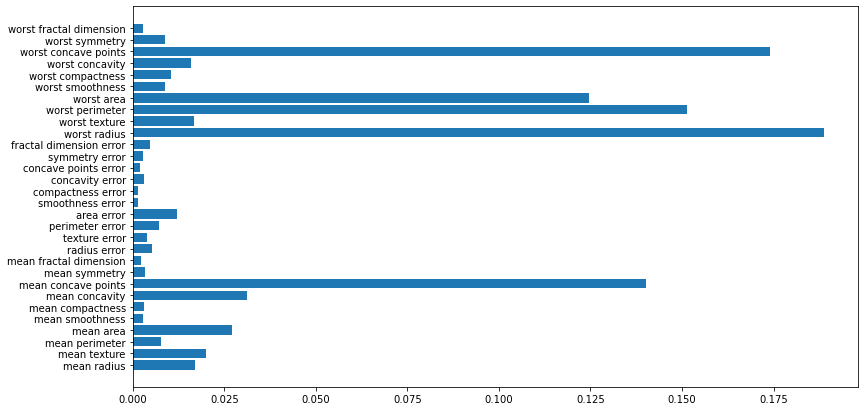

In [91]:
## 특성 중요도를 시각화하자.

plt.figure(figsize=(13,7))
#plt.barh(np.arange(len(forest.feature_importances_)),forest.feature_importances_)

#첫번째 매개인자 y는 
plt.barh(cancer.feature_names,forest.feature_importances_)


#plt.yticks(range(30),cancer.feature_names)
plt.show()

In [9]:
# 특성 중요도 출력하기

특성 중요도:
[0.82743395 0.17256605]


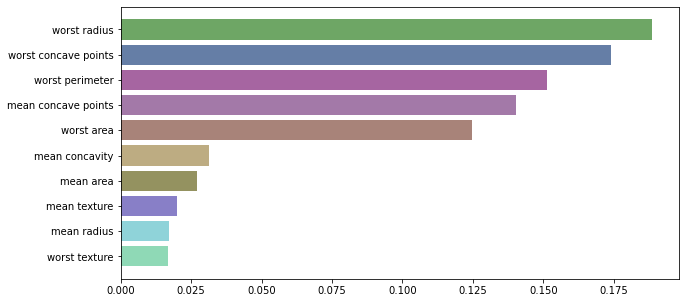

In [161]:
# 중요도 순으로 졍렬해서 시각화
dictionary = {key:value for key,value in zip(cancer.feature_names,forest.feature_importances_)}
datae = pd.Series(dictionary)

plt.figure(figsize=(10,5))
a = datae.sort_values(ascending=True).tail(10).values #여기서 이름때고, 값때고 ?
b = datae.sort_values(ascending=True).tail(10).index
#수작업...
plt.barh(b,a, color=['#8fd9b6','#8fd3d9','#887fc7','#949260','#bdac82','#a88379','#a379a8','#a665a1','#657ea6','#6ea665'])

plt.show()




### GridSearch를 사용해서 하이퍼 파라미터값 중에서 최적의 값을 찾아보자
<pre>
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'n_estimators' : [10,50,100]
}
</pre>

In [163]:
from sklearn.model_selection import GridSearchCV
#grid 서치를 위한 모듈

from sklearn.model_selection import KFold
#k-fold 
#데이터셋의 양이 부족할때, 트레이닝 데이터의 일부를 테스트 셋으로 돌려 validation작업을 하기 위한 KFold
forest = RandomForestClassifier(random_state=11)

#parameter로 쓸 값들
params = {
    'n_estimators' : [10,50,100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'max_features':[1,5,7,11]
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True
          )
grid = GridSearchCV(estimator=forest,
                    param_grid=params,
                    cv=kf)

grid.fit(X_train,y_train)

print("Grid search를 통해 얻은 파라미터를 통한 예측률 ! \n : {}".format(grid.score(X_test,y_test)))

Grid search를 통해 얻은 파라미터를 통한 예측률: 



#### GridSearch CV 테스트 결과

In [164]:
print(grid.score(X_test,y_test))

0.9473684210526315


In [165]:
#그리드는 어떤 놈들을 골랐을까?
grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=1, min_samples_leaf=8,
                       n_estimators=50, random_state=11)

In [167]:
#훈련상 점수
grid.best_score_

0.9514975845410628

In [180]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자

max_depths = [1,3,4,6,10,15]

for i in max_depths:
    #model 지정
    forest = RandomForestClassifier(max_depth=i,max_features='auto',random_state=100)
    #model 학습
    forest.fit(X_train,y_train)
    #model 평가
    
    print(f"max_depth={i} 정확도 : {forest.score(X_test,y_test)}")
    
#실시간 학습?


max_depth=1 정확도 : 0.9649122807017544
max_depth=3 정확도 : 0.9649122807017544
max_depth=4 정확도 : 0.9649122807017544
max_depth=6 정확도 : 0.9649122807017544
max_depth=10 정확도 : 0.9736842105263158
max_depth=15 정확도 : 0.9736842105263158


### Accuracy, precision, recall validation
<span style ="color:#8fd9b6">-> confusion_matrix </span>

In [184]:
from sklearn.metrics import confusion_matrix

cfs = confusion_matrix(prediction,y_test)
cfs

array([[46,  3],
       [ 1, 64]], dtype=int64)

In [197]:
pd.DataFrame(cfs,index=cancer.target_names,columns=cancer.target_names)

,malignant,benign
malignant,46,3
benign,1,64


In [194]:
#정확도 손수 구하기
accuracy_by_hand = (cfs[0][0]+cfs[1][1])/cfs.sum()

print(accuracy)
print(accuracy_score(prediction,y_test))

#정밀도 구하기
#사실인데 사실이라고 한 것 /거짓인데 사실이라고 한것 +사실인데 사실이라고 한것 
precision = cfs[0][0] / (cfs[0][0]+cfs[1][0])
print("정밀도 분석결과 : {}".format(precision)) #이는 사실인 경우를 알 때만 구할 수 있음. 즉, y_test가 있어야 가능.
#정밀도가 낮다?
#거짓인데 사실이라고 한 것이 많다. 
#암을 예를 들어서, 암이 아닌데 암이라고 하였다. -> 암인데 암이 아니라고 하는 것보다는 훨씬 좋다. 



#재현성 구하기
#사실인데 사실이라고 한 것 / 사실인데 거짓이라고 한 것 + 사실인데 사실이라고 한 것
recall = cfs[0][0] / (cfs[0][0]+cfs[0][1])
print("재현성 분석결과 : {}".format(recall))


0.9649122807017544
0.9649122807017544
정밀도 분석결과 : 0.9787234042553191
재현성 분석결과 : 0.9387755102040817


### Lesson learned

#### 정밀도
* 정밀도가 낮다?
    * 거짓인데 사실이라고 한 것이 많다. 
    * <span style= "color:pink">"암일 확률"</span>에 대한 정밀도라고 했을때를 예로 들면 암이 아닌데 암이라고 하는 경우. 
        * 암인데 암이 아니라고 하는 것보다는 훨씬 좋다. 
        
    * <span style= "color:pink">그러나 "암이 아닐 확률"에 대한 정밀도라면?</span>
        * 암이 아니다를 1, 암이 맞다를 0으로 계산...
        * 따라서 이 때 정밀도가 낮으면, 암이 맞는데 암이 아니라고 하는 경우가 된다. 
        * 이때는 높은 정밀도가 요구.
        <br><br>


#### 재현성
* 재현성이 떨어진다?
    * 사실인데 거짓이라고 한 것이 많다.
    * 위와 같은 예로, <span style= "color:pink">암일 확률을 구한다면</span> 암인데 암이 아니라고 하는 경우.
    * 반대로 <span style= "color:pink">암이 아닐 확률을 구한다면</span>  암이 아닌데 암이라고 하는 경우. 
    <br><br>
    
#### 요약
  
    어떤의미에서 재현성과 정밀도는 '정확성'이라는것을 기준으로 하여, 
    내가 보고자 하는(positive value)가 무엇인가에 따라 그 의미가 상반되는 개념이다. 
    좋은 데이터는 재현성과 정밀도가 간극이 좁은 상태로 정확성이 높은 값이어야 할 것이다.
    


#### 끝마치기 전에... 
- 모델은 입력된 데이터를 토대로 해당 record (row)가 암인지 아닌지를 96.x% 확률로 알아낼 것이다...
- 그런데 정밀도와 재현성에 대한 기준은 모호하다 
    - 왜?
        - 왜냐하면 정밀도, 재현성, 정확도는 모두 실제 레코드값을 비교해서 얻어지는데, 여기서 참인 값은 사람이 정하기 때문이다.
        <br><br>
        - 즉, 사람이 "암인 경우를 참 이라고 정하겠다" 라고 하면 실제로는 암인데 암이 아닌 경우를 높게 측정한(재현성)이 낮은 레코드가 좀더 믿기에는 위험한 자료가 될 것이고 
        <br><br>
        - "정상인 경우(암이 아닌 경우)를 참이라고 하겠다"라고 하면 실제로는 정상이 아닌데 정상이라고 한 정밀도가 낮은 모델이 위험한 모델이 된다. 
       